In [23]:
# Studi Kasus Point gamifikasi dengan fuzzy logic
# 2 input
# 1. Menggunakan Aplikasi=Experience(Exp)
# (Lama, Lumayan, Bentar)= long, enough, short
# 2. Jumlah Transakasi = quantity(Qty)
# (Banyak, Cukup, Sedikit)=  lot, Sufficient(suff), few
# 1 Output poin=Point
# (Poor, Normal ,Excellent(Excel))
# library numpy untuk operasi matriks
import numpy as np
# library matplotlib untuk plot grafik
import matplotlib.pyplot as plt

Exp = 0
Qty = 0
Point = 0
Elong = 0
Eenough = 0
Eshort = 0
Qlot = 0
Qsuff = 0
Qfew = 0
Ppoor = 0
Pnormal = 0
Pexcel = 0
inputExp = 0
inputQty = 0
SamPoor1 = 0
SamPoor2 = 0
SamPoor3 = 0
SamNormal1 = 0
SamNormal2 = 0
SamNormal3 = 0
SamExcel1 = 0
SamExcel2 = 0
SamExcel3 = 0
temp = 0
reward = 0

# Fuzzification
def ValueEshort(inputExp):
    a = 3
    b = 6
    if inputExp < 3:
        return 1
    elif inputExp > 3 and inputExp < 6:
        return (b - inputExp) / (b - a)
    elif inputExp >= 6:
        return 0

def ValueEenough(inputExp):
    a = 3
    b = 6
    c = 9
    if inputExp < 3:
        return 0
    elif inputExp > 3 and inputExp < 6:
        return (inputExp - a) / (b - a)
    elif inputExp == 6:
        return 1
    elif inputExp > 6 and inputExp < 9:
        return (c - inputExp) / (c - b)
    elif inputExp >= 9:
        return 0

def ValueElong(inputExp):
    a = 6
    b = 9
    if inputExp <= 6:
        return 0
    elif inputExp > 6 and inputExp < 9:
        return (inputExp - a) / (b - a)
    elif inputExp >= 9:
        return 1

def ValueQfew(inputQty):
    a = 5
    b = 10
    if inputQty < 5:
        return 1
    elif inputQty > 5 and inputQty < 10:
        return (b - inputQty) / (b - a)
    elif inputQty >= 10:
        return 0

def ValueQsuff(inputQty):
    a = 5
    b = 10
    c = 15
    if inputQty < 5:
        return 0
    elif inputQty > 5 and inputQty < 10:
        return (inputQty - a) / (b - a)
    elif inputQty == 10:
        return 1
    elif inputQty > 10 and inputQty < 15:
        return (c - inputQty) / (c - b)
    elif inputQty >= 15:
        return 0

def ValueQlot(inputQty):
    a = 10
    b = 15
    if inputQty < 10:
        return 0
    elif inputQty > 10 and inputQty < 15:
        return (inputQty - a) / (b - a)
    elif inputQty >= 15:
        return 1

def fuzzyfication1(inputExp):
    global Eshort, Eenough, Elong
    Eshort = ValueEshort(inputExp)
    Eenough = ValueEenough(inputExp)
    Elong = ValueElong(inputExp)

def fuzzyfication2(inputQty):
    global Qfew, Qsuff, Qlot
    Qfew = ValueQfew(inputQty)
    Qsuff = ValueQsuff(inputQty)
    Qlot = ValueQlot(inputQty)

# Inferensi membuat rules
def rules(nilai1, nilai2, temp, point):
    if nilai1 >= nilai2:
        temp = nilai2
    else:
        temp = nilai1
    if temp >= point:
        return temp
    else:
        return point


# Defuzzification dengan metode namdani
def defuzziNamdani(SamPoor1, SamPoor2, SamPoor3, SamNormal1, SamNormal2, SamNormal3, SamExcel1, SamExcel2, SamExcel3):
    global reward
    divisor = ((Ppoor * 3) + (Pnormal * 3) + (Pexcel * 3))
    reward = ((Ppoor * SamPoor1) + (Ppoor * SamPoor2) + (Ppoor * SamPoor3) +
             (Pnormal * SamNormal1) + (Pnormal * SamNormal2) + (Pnormal * SamNormal3) +
             (Pexcel * SamExcel1) + (Pexcel * SamExcel2) + (Pexcel * SamExcel3))/divisor


# Main program
# print("Masukan berapa banyak transaksi anda pada aplikasi ini dalam sebulan [1-30] = ")
# inputQty = float(input())
# print("Masukan berapa lama anda bergabung pada aplikasi ini     [1-12 dalam bulan] = ")
# inputExp = float(input())
inputQty = 8
inputExp = 6
fuzzyfication2(inputQty)
fuzzyfication1(inputExp)

# Fuzzification
print("\nFuzzifikasi dari banyaknya transaksi : ")
print("Quantity Few           = ", Qfew)
print("Quantity Sufficient    = ", Qsuff)
print("Quantity Lot           = ", Qlot)

print("\nFuzzifikasi dari lama bergabung : ")
print("Experience Short       = ", Eshort)
print("Experience Enough      = ", Eenough)
print("Experience Long        = ", Elong)

# Inferensi
Ppoor = rules(Qfew, Elong, Ppoor, Ppoor)
Ppoor = rules(Qfew, Eenough, Ppoor, Ppoor)
Ppoor = rules(Qfew, Eshort, Ppoor, Ppoor)
Ppoor = rules(Qsuff, Elong, Ppoor, Ppoor)
Pnormal = rules(Qsuff, Eenough, Pnormal, Pnormal)
Pnormal = rules(Qsuff, Eshort, Pnormal, Pnormal)
Pnormal = rules(Qlot, Elong, Pnormal, Pnormal)
Pexcel = rules(Qlot, Eenough, Pexcel, Pexcel)
Pexcel = rules(Qlot, Eshort, Pexcel, Pexcel)


print("\nConclusion : ")
print("Point Poor     = ", Ppoor)
print("Point Normal   = ", Pnormal)
print("Point Excellent = ", Pexcel)

# Defuzzification
# Sample for defuzzification
print("#3 Sample Poor [Kisaran 1-24]")
print("Sample Point Poor Pertama      = 10")
print("Sample Point Poor Kedua        = 15")
print("Sample Point Poor Ketiga       = 20")
print("#3 Sample Normal [Kisaran 26-74]")
print("Sample Point Normal Pertama    = 45")
print("Sample Point Normal Kedua      = 50")
print("Sample Point Normal Ketiga     = 55")
print("#3 Sample Excellent [Kisaran 76-99]")
print("Sample Point Excellent Pertama  = 80")
print("Sample Point Excellent Kedua    = 85")
print("Sample Point Excellent Ketiga   = 90")

defuzziNamdani(1, 10, 20, 25, 50, 75, 100, 100, 100)

print("\nDefuzzification : ")
print("Reward = ", reward, " Point")



Fuzzifikasi dari banyaknya transaksi : 
Quantity Few           =  0.4
Quantity Sufficient    =  0.6
Quantity Lot           =  0

Fuzzifikasi dari lama bergabung : 
Experience Short       =  0
Experience Enough      =  1
Experience Long        =  None


TypeError: '>=' not supported between instances of 'float' and 'NoneType'

In [13]:
# Fuzzification untuk inputan Experience
def ValueEshort(inputExp):
    a = 3
    b = 6
    if inputExp < 3:
        return 1
    elif inputExp > 3 and inputExp < 6:
        return (b - inputExp) / (b - a)
    elif inputExp >= 6:
        return 0

def ValueEenough(inputExp):
    a = 3
    b = 6
    c = 9
    if inputExp < 3:
        return 0
    elif inputExp > 3 and inputExp < 6:
        return (inputExp - a) / (b - a)
    elif inputExp == 6:
        return 1
    elif inputExp > 6 and inputExp < 9:
        return (c - inputExp) / (c - b)
    elif inputExp >= 9:
        return 0

def ValueElong(inputExp):
    a = 6
    b = 9
    if inputExp < 6:
        return 0
    elif inputExp > 6 and inputExp < 9:
        return (inputExp - a) / (b - a)
    elif inputExp >= 9:
        return 1

In [ ]:
# Fuzzification untuk inputan Quantity
# membuat trapesium Qfew, Qsuff, Qlot
x1 = np.arange(0, 10, 0.1)
x2 = np.arange(5, 15, 0.1)
x3 = np.arange(10, 20, 0.1)

# menampilkan grafik Qfew, Qsuff, Qlot
plt.plot(x1, [ValueQfew(i) for i in x1], label='Qfew')
plt.plot(x2, [ValueQsuff(i) for i in x2], label='Qsuff')
plt.plot(x3, [ValueQlot(i) for i in x3], label='Qlot')
plt.title('Grafik Qfew, Qsuff, Qlot')
plt.legend()
plt.show()
def ValueQfew(inputQty):
    a = 5
    b = 10
    if inputQty < 5:
        return 1
    elif inputQty > 5 and inputQty < 10:
        return (b - inputQty) / (b - a)
    elif inputQty >= 10:
        return 0

def ValueQsuff(inputQty):
    a = 5
    b = 10
    c = 15
    if inputQty < 5:
        return 0
    elif inputQty > 5 and inputQty < 10:
        return (inputQty - a) / (b - a)
    elif inputQty == 10:
        return 1
    elif inputQty > 10 and inputQty < 15:
        return (c - inputQty) / (c - b)
    elif inputQty >= 15:
        return 0

def ValueQlot(inputQty):
    a = 10
    b = 15
    if inputQty < 10:
        return 0
    elif inputQty > 10 and inputQty < 15:
        return (inputQty - a) / (b - a)
    elif inputQty >= 15:
        return 1

def fuzzyficationExp(inputExp):
    global Eshort, Eenough, Elong
    Eshort = ValueEshort(inputExp)
    Eenough = ValueEenough(inputExp)
    Elong = ValueElong(inputExp)

def fuzzyficationExp(inputQty):
    global Qfew, Qsuff, Qlot
    Qfew = ValueQfew(inputQty)
    Qsuff = ValueQsuff(inputQty)
    Qlot = ValueQlot(inputQty)

# Inferensi membuat rules
def rules(nilai1, nilai2, temp, point):
    if nilai1 >= nilai2:
        temp = nilai2
    else:
        temp = nilai1
    if temp >= point:
        return temp
    else:
        return point


# Defuzzification dengan metode namdani
def defuzziNamdani(SamPoor1, SamPoor2, SamPoor3, SamNormal1, SamNormal2, SamNormal3, SamExcel1, SamExcel2, SamExcel3):
    global reward
    divisor = ((Ppoor * 3) + (Pnormal * 3) + (Pexcel * 3))
    reward = ((Ppoor * SamPoor1) + (Ppoor * SamPoor2) + (Ppoor * SamPoor3) +
             (Pnormal * SamNormal1) + (Pnormal * SamNormal2) + (Pnormal * SamNormal3) +
             (Pexcel * SamExcel1) + (Pexcel * SamExcel2) + (Pexcel * SamExcel3))/divisor


# Main program
# print("Masukan berapa banyak transaksi anda pada aplikasi ini dalam sebulan [1-30] = ")
# inputQty = float(input())
# print("Masukan berapa lama anda bergabung pada aplikasi ini     [1-12 dalam bulan] = ")
# inputExp = float(input())
inputQty = 8
inputExp = 7
fuzzyficationExp(inputQty)
fuzzyficationExp(inputExp)

# Fuzzification
print("\nFuzzifikasi dari banyaknya transaksi : ")
print("Quantity Few           = ", Qfew)
print("Quantity Sufficient    = ", Qsuff)
print("Quantity Lot           = ", Qlot)

print("\nFuzzifikasi dari lama bergabung : ")
print("Experience Short       = ", Eshort)
print("Experience Enough      = ", Eenough)
print("Experience Long        = ", Elong)

# Inferensi
Ppoor = rules(Qfew, Elong, Ppoor, Ppoor)
Ppoor = rules(Qfew, Eenough, Ppoor, Ppoor)
Ppoor = rules(Qfew, Eshort, Ppoor, Ppoor)
Ppoor = rules(Qsuff, Elong, Ppoor, Ppoor)
Pnormal = rules(Qsuff, Eenough, Pnormal, Pnormal)
Pnormal = rules(Qsuff, Eshort, Pnormal, Pnormal)
Pnormal = rules(Qlot, Elong, Pnormal, Pnormal)
Pexcel = rules(Qlot, Eenough, Pexcel, Pexcel)
Pexcel = rules(Qlot, Eshort, Pexcel, Pexcel)


print("\nConclusion : ")
print("Point Poor     = ", Ppoor)
print("Point Normal   = ", Pnormal)
print("Point Excellent = ", Pexcel)

# Defuzzification
# Sample for defuzzification
print("#3 Sample Poor [Kisaran 1-24]")
print("Sample Point Poor Pertama      = 10")
print("Sample Point Poor Kedua        = 15")
print("Sample Point Poor Ketiga       = 20")
print("#3 Sample Normal [Kisaran 26-74]")
print("Sample Point Normal Pertama    = 45")
print("Sample Point Normal Kedua      = 50")
print("Sample Point Normal Ketiga     = 55")
print("#3 Sample Excellent [Kisaran 76-99]")
print("Sample Point Excellent Pertama  = 80")
print("Sample Point Excellent Kedua    = 85")
print("Sample Point Excellent Ketiga   = 90")

defuzziNamdani(1, 10, 20, 25, 50, 75, 100, 100, 100)

print("\nDefuzzification : ")
print("Reward = ", reward, " Point")


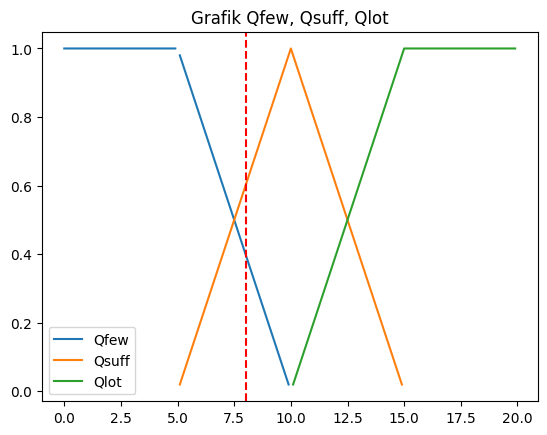

In [11]:
# membuat trapesium Qfew, Qsuff, Qlot
x1 = np.arange(0, 10, 0.1)
x2 = np.arange(5, 15, 0.1)
x3 = np.arange(10, 20, 0.1)

# menampilkan grafik Qfew, Qsuff, Qlot dengan garis vertical dari input di angka 8
plt.plot(x1, [ValueQfew(i) for i in x1], label='Qfew')
plt.plot(x2, [ValueQsuff(i) for i in x2], label='Qsuff')
plt.plot(x3, [ValueQlot(i) for i in x3], label='Qlot')
plt.axvline(x=inputQty, color='r', linestyle='--')
plt.title('Grafik Qfew, Qsuff, Qlot')
plt.legend()


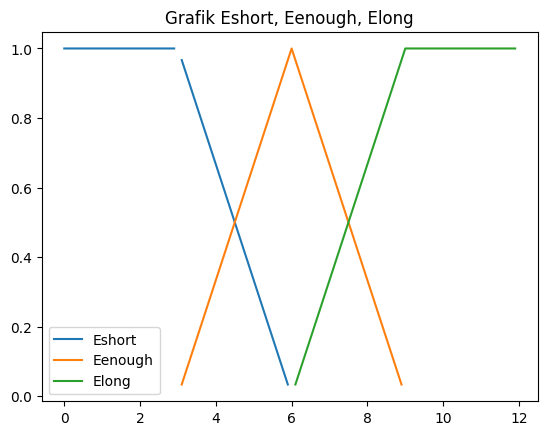

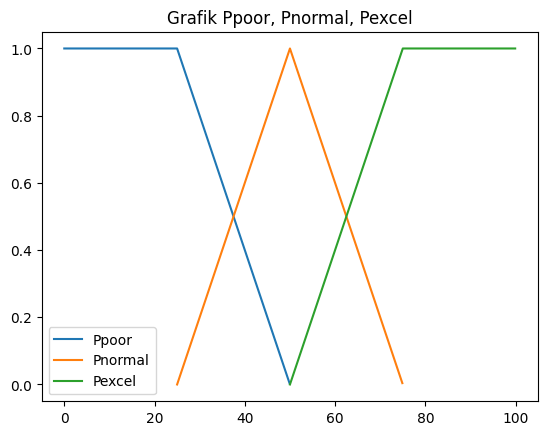

In [8]:
# fungsi untuk menampilkan grafik Ppoor, Pnormal, Pexcel
def Ppoor(x):
    a=25
    b=50
    if x <= 25:
        return 1
    elif x > 25 and x < 50:
        return (50 - x) / (50 - 25)
    elif x >= 50:
        return 0

def Pnormal(x):
    a=25
    b=50
    c=75
    if x <= 25:
        return 0
    elif x > 25 and x < 50:
        return (x - a) / (b - a)
    elif x == 50:
        return 1
    elif x > 50 and x < 75:
        return (c - x) / (c - b)
    elif x >= 75:
        return 0
    
def Pexcel(x):
    a=50
    b=75
    if x <= 50:
        return 0
    elif x > 50 and x < 75:
        return (x - a) / (b - a)
    elif x >= 75:
        return 1
    
# membuat trapesium Ppoor, Pnormal, Pexcel
x7 = np.arange(0, 50, 0.1)
x8 = np.arange(25, 75, 0.1)
x9 = np.arange(50, 100, 0.1)

# menampilkan grafik Ppoor, Pnormal, Pexcel
plt.plot(x7, [Ppoor(i) for i in x7], label='Ppoor')
plt.plot(x8, [Pnormal(i) for i in x8], label='Pnormal')
plt.plot(x9, [Pexcel(i) for i in x9], label='Pexcel')
plt.title('Grafik Ppoor, Pnormal, Pexcel')
plt.legend()
plt.show()
    